In [2]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.1 MB/s 
     |████████████████████████████████| 465 kB 58.4 MB/s 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/hojunlee-hj/CapstoneDesign/main/Data/issueClassDataset.csv", filename="issueClassDataset.csv")

('issueClassDataset.csv', <http.client.HTTPMessage at 0x7f14f986e050>)

In [5]:
temp_data = pd.read_csv('issueClassDataset.csv', index_col = 'id')

In [6]:
temp_data

,document,label,label2
id,,,
1,몇년간 잘만 쓰고 있었는데요,0,0
2,최근 업뎃이후로 너무 불편해서 리뷰를 다 써보러 와요,0,0
3,업뎃후 적응이야 늘 하는거지만 적당히 바껴야되는데,0,3
4,대체 좋아요 랑 댓글 위치까진ㅋㅋㅋㅋㅋ왜 바꾸는건짘ㅋㅋㅋㅠㅠ너무 자주 바뀌는 설정들...,0,0
5,군대 전역전까지 메롱쓰다가 년 전역후부터 지니뮤직으로 갈아탄후 계속 사용하고있는 유...,0,3
...,...,...,...
21877,그리고 한시간전에 리뷰남겼는데 맘대로 삭제가 됐네요,0,2
21878,아니 왜 포인트에 관한게 하나도 안뜨냐 인터넷이랑 공지사항보고 하란대로 다했는데 포...,0,2
21879,기가지니에서는 끊기네요,0,1


In [7]:
dataSet = pd.merge(temp_data.iloc[0:8001], temp_data.iloc[14001:], how='outer')

In [8]:
dataSet

,document,label,label2
0,몇년간 잘만 쓰고 있었는데요,0,0
1,최근 업뎃이후로 너무 불편해서 리뷰를 다 써보러 와요,0,0
2,업뎃후 적응이야 늘 하는거지만 적당히 바껴야되는데,0,3
3,대체 좋아요 랑 댓글 위치까진ㅋㅋㅋㅋㅋ왜 바꾸는건짘ㅋㅋㅋㅠㅠ너무 자주 바뀌는 설정들...,0,0
4,군대 전역전까지 메롱쓰다가 년 전역후부터 지니뮤직으로 갈아탄후 계속 사용하고있는 유...,0,3
...,...,...,...
16092,그리고 한시간전에 리뷰남겼는데 맘대로 삭제가 됐네요,0,2
16093,아니 왜 포인트에 관한게 하나도 안뜨냐 인터넷이랑 공지사항보고 하란대로 다했는데 포...,0,2
16094,기가지니에서는 끊기네요,0,1
16095,이제는 노래 재생도 안된다,0,4


In [9]:
valid_class = ['0', '1', '2', '3', '4', '5']
dataSet = dataSet[(dataSet["label"] == 0) & (dataSet["label2"].isin(valid_class))]

In [10]:
dataSet

,document,label,label2
0,몇년간 잘만 쓰고 있었는데요,0,0
1,최근 업뎃이후로 너무 불편해서 리뷰를 다 써보러 와요,0,0
2,업뎃후 적응이야 늘 하는거지만 적당히 바껴야되는데,0,3
3,대체 좋아요 랑 댓글 위치까진ㅋㅋㅋㅋㅋ왜 바꾸는건짘ㅋㅋㅋㅠㅠ너무 자주 바뀌는 설정들...,0,0
4,군대 전역전까지 메롱쓰다가 년 전역후부터 지니뮤직으로 갈아탄후 계속 사용하고있는 유...,0,3
...,...,...,...
16092,그리고 한시간전에 리뷰남겼는데 맘대로 삭제가 됐네요,0,2
16093,아니 왜 포인트에 관한게 하나도 안뜨냐 인터넷이랑 공지사항보고 하란대로 다했는데 포...,0,2
16094,기가지니에서는 끊기네요,0,1
16095,이제는 노래 재생도 안된다,0,4


In [11]:
from sklearn.model_selection import train_test_split

X = dataSet["document"]
y = dataSet["label2"]
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [12]:
X_train

7029             밤에 차량에서 운전중 노래곡이 넘어갈때마다 화면이 켜져서 운전이 불편합니다
8295                                                     좀
11480              결제한 상태인데도 자꾸 끊기고 결제하라고 떠서 노래를 들을 수가 없어요
13110                                     트로트 차트 하나 만들어주세요
5386                                   이 오류 좀 없애주세요 ㅠㅠㅠㅋㅋㅋ
                               ...                        
1313                                                개선해주세요
8609                                 최근에 계속 지멋대로 실행푸시가 뜹니다
13277          로그인 오류랑 네트워크 오류에 서버는 자주 터지고 노래를 듣는데 지장이 많네요
13767    데이터 쓰고 와이파이 빵빵한데 네트워크가 원활하지 않다고 뜨고 노래 재생도 안되네요...
2085             음원 마음대로 들을수도 있고ㅋ 근데 이게 간헐적으로 버퍼링이 경우가 있네요
Name: document, Length: 10215, dtype: object

In [13]:
y

0        0
1        0
2        3
3        0
4        3
        ..
16092    2
16093    2
16094    1
16095    4
16096    1
Name: label2, Length: 14593, dtype: object

In [14]:
len(X_train), len(X_test), len(y_train), len(y_test)

(10215, 4378, 10215, 4378)

In [15]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [16]:
def preprocessor(text:str) -> str:
    # text = X_train.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
    text = re.sub('[\W]+', '', text)
    text = re.sub('[ㅋ|ㅠ|ㅜ|ㅎ|ㅇ|ㅡ|ㅅ|ㅂ|!|?|.|,|;]+', '', text)
    return text

# Stemming
def tokenizer_porter_kor(text):
    """
        norm : If True, normalize tokens
        stem : If True, stem tokens
    """
    return okt.morphs(text, norm=True, stem=True)

In [17]:
X_train

7029             밤에 차량에서 운전중 노래곡이 넘어갈때마다 화면이 켜져서 운전이 불편합니다
8295                                                     좀
11480              결제한 상태인데도 자꾸 끊기고 결제하라고 떠서 노래를 들을 수가 없어요
13110                                     트로트 차트 하나 만들어주세요
5386                                   이 오류 좀 없애주세요 ㅠㅠㅠㅋㅋㅋ
                               ...                        
1313                                                개선해주세요
8609                                 최근에 계속 지멋대로 실행푸시가 뜹니다
13277          로그인 오류랑 네트워크 오류에 서버는 자주 터지고 노래를 듣는데 지장이 많네요
13767    데이터 쓰고 와이파이 빵빵한데 네트워크가 원활하지 않다고 뜨고 노래 재생도 안되네요...
2085             음원 마음대로 들을수도 있고ㅋ 근데 이게 간헐적으로 버퍼링이 경우가 있네요
Name: document, Length: 10215, dtype: object

In [18]:
type(X_train)

pandas.core.series.Series

### TFIDF DataSet 생성

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

okt = Okt()

tfidf = TfidfVectorizer(strip_accents=None,
                        preprocessor=preprocessor,           
                        tokenizer=tokenizer_porter_kor,
                        stop_words=stopwords,             
                        max_df=0.1,                          
                        min_df=10)                           

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['가다', '늘다', '들다', '오다', '자다'] not in stop_words.
  % sorted(inconsistent)


In [20]:
X_train_tfidf.shape, X_test_tfidf.shape

((10215, 1324), (4378, 1324))

In [21]:
# print('훈련용 리뷰 개수 :',len(train_data)) # 훈련용 리뷰 개수 출력
# print('Genie dataset: ', len(temp_data))
# train_data = train_data.append(temp_data[:3500], ignore_index=True)
# test_data = test_data.append(temp_data[3500:], ignore_index=True)
# print('훈련용 리뷰 개수 :',len(train_data)) # 훈련용 리뷰 개수 출력
# print('Genie dataset: ', len(test_data))

In [22]:
# train_data[:5] # 상위 5개 출력


In [23]:
# print('테스트용 리뷰 개수 :',len(test_data)) # 테스트용 리뷰 개수 출력


In [24]:
# test_data[:5]


In [25]:
# # document 열과 label 열의 중복을 제외한 값의 개수
# train_data['document'].nunique(), train_data['label'].nunique()

In [26]:
# # document 열의 중복 제거
# train_data.drop_duplicates(subset=['document'], inplace=True)

In [27]:
# print('총 샘플의 수 :',len(train_data))


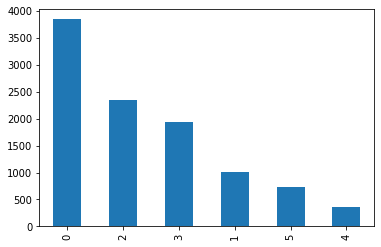

In [28]:
y_train.value_counts().plot(kind = 'bar')


In [29]:
# print(train_data.groupby('label').size().reset_index(name = 'count'))


In [30]:
# print(train_data.isnull().values.any())


In [31]:
# print(train_data.isnull().sum())


In [32]:
# train_data.loc[train_data.document.isnull()]


In [33]:
# train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
# print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

In [34]:
# print(len(train_data))


In [35]:
# 한글과 공백을 제외하고 모두 제거
X_train = X_train.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
X_train[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


7029     밤에 차량에서 운전중 노래곡이 넘어갈때마다 화면이 켜져서 운전이 불편합니다
8295                                             좀
11480      결제한 상태인데도 자꾸 끊기고 결제하라고 떠서 노래를 들을 수가 없어요
13110                             트로트 차트 하나 만들어주세요
5386                           이 오류 좀 없애주세요 ㅠㅠㅠㅋㅋㅋ
Name: document, dtype: object

In [36]:
X_train= X_train.str.replace('^ +', "") # white space 데이터를 empty value로 변경
X_train.replace('', np.nan, inplace=True)
print(X_train.isnull().sum())

0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [37]:
# train_data.loc[train_data.document.isnull()][:5]


In [38]:
# train_data = train_data.dropna(how = 'any')
# print(len(train_data))

In [39]:
X_test = X_test.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
X_test = X_test.str.replace('^ +', "") # 공백은 empty 값으로 변경
X_test.replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
X_test = X_test.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(X_test))

전처리 후 테스트용 샘플의 개수 : 4378


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [40]:
okt = Okt()
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)

['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [41]:
X_train_dataset = []
for sentence in tqdm(X_train):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train_dataset.append(stopwords_removed_sentence)

100%|██████████| 10215/10215 [00:21<00:00, 464.42it/s]


In [42]:
print(X_train_dataset[:3])


[['밤', '차량', '에서', '운전', '중', '노래', '곡', '넘어가다', '때', '마다', '화면', '켜다', '운전', '불편하다'], [], ['결제', '상태', '인데', '자꾸', '끊기다', '결제', '하', '라고', '뜨다', '노래', '들다', '수가', '없다']]


In [43]:
X_test_datatset = []
for sentence in tqdm(X_test):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test_datatset.append(stopwords_removed_sentence)

100%|██████████| 4378/4378 [00:08<00:00, 489.63it/s]


In [44]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_dataset)

In [45]:
print(tokenizer.word_index)


{'노래': 1, '되다': 2, '있다': 3, '재생': 4, '안되다': 5, '을': 6, '지니': 7, '안': 8, '곡': 9, '로': 10, '없다': 11, '너무': 12, '좋다': 13, '만': 14, '뜨다': 15, '듣다': 16, '아니다': 17, '앱': 18, '왜': 19, '요': 20, '에서': 21, '계속': 22, '때': 23, '쓰다': 24, '음악': 25, '해주다': 26, '같다': 27, '로그인': 28, '않다': 29, '사용': 30, '다': 31, '업데이트': 32, '어플': 33, '네트워크': 34, '나오다': 35, '들다': 36, '다른': 37, '다시': 38, '불편하다': 39, '진짜': 40, '오류': 41, '하고': 42, '문제': 43, '못': 44, '보다': 45, '연결': 46, '것': 47, '그렇다': 48, '목록': 49, '뮤직': 50, '기능': 51, '자다': 52, '중': 53, '끊기다': 54, 'ㅠㅠ': 55, '돼다': 56, '플레이': 57, '제': 58, '수': 59, '거': 60, '이다': 61, '리스트': 62, '누르다': 63, '갑자기': 64, '들어가다': 65, '자꾸': 66, '화면': 67, '개선': 68, '고': 69, '돈': 70, '인데': 71, '추가': 72, '삭제': 73, '결제': 74, '넘어가다': 75, '제발': 76, '이용권': 77, '데이터': 78, '많다': 79, '멜론': 80, '부탁드리다': 81, '부터': 82, '실행': 83, '하': 84, '면': 85, '되어다': 86, '그': 87, '뭐': 88, '고치다': 89, '다음': 90, '싶다': 91, '폰': 92, '받다': 93, '해결': 94, '검색': 95, '나': 96, '이렇다': 97, '만들다': 98, '이용': 99, '설정': 100, '

In [46]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 5922
등장 빈도가 2번 이하인 희귀 단어의 수: 3295
단어 집합에서 희귀 단어의 비율: 55.63998649105032
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.115005610215936


In [47]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 2628


In [48]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train_dataset)
X_train = tokenizer.texts_to_sequences(X_train_dataset)
X_test = tokenizer.texts_to_sequences(X_test_datatset)

In [49]:
print(X_train[:3])


[[1021, 548, 21, 704, 53, 1, 9, 75, 23, 117, 67, 138, 704, 39], [], [74, 164, 71, 66, 54, 74, 84, 146, 15, 1, 36, 606, 11]]


In [50]:
len(X_train)

10215

In [51]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [52]:
drop_train

[1,
 72,
 353,
 1241,
 2263,
 2288,
 3190,
 3354,
 4087,
 4644,
 5089,
 6136,
 6386,
 6613,
 7043,
 7134,
 8048,
 8072,
 8937]

In [53]:
# X_train[drop_train]

In [54]:
len(X_train), len(y_train)

(10215, 10215)

In [55]:
# # 빈 샘플들을 제거
# X_train = np.delete(X_train, drop_train, axis=0)
# y_train = np.delete(y_train, drop_train, axis=0)
# print(len(X_train))
# print(len(y_train))

리뷰의 최대 길이 : 108
리뷰의 평균 길이 : 12.425844346549193


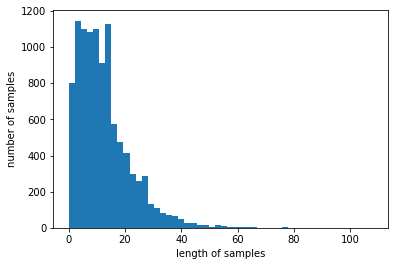

In [56]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [57]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [58]:
max_len = 35
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 35 이하인 샘플의 비율: 97.26872246696036


In [59]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [60]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [61]:
y_train[:5], y_train.shape

(array([[0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.]], dtype=float32), (10215, 6))

In [62]:
y_test[:5], y_test.shape

(array([[1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0.]], dtype=float32), (4378, 6))

In [63]:
X_train[:5], X_train.shape

(array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1021,
          548,   21,  704,   53,    1,    9,   75,   23,  117,   67,  138,
          704,   39],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           74,  164,   71,   66,   54,   74,   84,  146,   15,    1,   36,
          606,   11],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,  682,  204,
          136,   98],
        [   

In [64]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, SpatialDropout1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import save_model


embedding_dim = 128
hidden_units = 256

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(hidden_units, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(6, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=30, callbacks=[es, mc], batch_size=128, validation_split=0.2)
save_model(model,'/content/sample_data/')

Epoch 1/30
64/64 [==============================] - ETA: 0s - loss: 1.5207 - acc: 0.4071
Epoch 1: val_acc improved from -inf to 0.45962, saving model to best_model.h5
64/64 [==============================] - 18s 188ms/step - loss: 1.5207 - acc: 0.4071 - val_loss: 1.4191 - val_acc: 0.4596
Epoch 2/30
64/64 [==============================] - ETA: 0s - loss: 1.3601 - acc: 0.4868
Epoch 2: val_acc improved from 0.45962 to 0.53402, saving model to best_model.h5
64/64 [==============================] - 11s 178ms/step - loss: 1.3601 - acc: 0.4868 - val_loss: 1.2297 - val_acc: 0.5340
Epoch 3/30
64/64 [==============================] - ETA: 0s - loss: 1.2442 - acc: 0.5300
Epoch 3: val_acc improved from 0.53402 to 0.56437, saving model to best_model.h5
64/64 [==============================] - 11s 176ms/step - loss: 1.2442 - acc: 0.5300 - val_loss: 1.1593 - val_acc: 0.5644
Epoch 4/30
64/64 [==============================] - ETA: 0s - loss: 1.1697 - acc: 0.5597
Epoch 4: val_acc improved from 0.56437

In [ ]:
embedding_dim = 128
hidden_units = 256

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(hidden_units, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(6, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train_tfidf.toarray(), y_train, epochs=30, callbacks=[es, mc], batch_size=128, validation_split=0.2)
save_model(model,'/content/sample_data/')

Epoch 1/30
64/64 [==============================] - ETA: 0s - loss: 1.5780 - acc: 0.3681
Epoch 1: val_acc improved from -inf to 0.38424, saving model to best_model.h5
64/64 [==============================] - 402s 6s/step - loss: 1.5780 - acc: 0.3681 - val_loss: 1.5709 - val_acc: 0.3842
Epoch 2/30
64/64 [==============================] - ETA: 0s - loss: 1.5633 - acc: 0.3743
Epoch 2: val_acc did not improve from 0.38424
64/64 [==============================] - 398s 6s/step - loss: 1.5633 - acc: 0.3743 - val_loss: 1.5578 - val_acc: 0.3842
Epoch 3/30
64/64 [==============================] - ETA: 0s - loss: 1.5621 - acc: 0.3743
Epoch 3: val_acc did not improve from 0.38424
64/64 [==============================] - 405s 6s/step - loss: 1.5621 - acc: 0.3743 - val_loss: 1.5588 - val_acc: 0.3842
Epoch 4/30
64/64 [==============================] - ETA: 0s - loss: 1.5600 - acc: 0.3744
Epoch 4: val_acc did not improve from 0.38424
64/64 [==============================] - 403s 6s/step - loss: 1.5600

In [73]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

137/137 [==============================] - 3s 20ms/step - loss: 0.9865 - acc: 0.6407

 테스트 정확도: 0.6407


In [67]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  print(np.argmax(loaded_model.predict(pad_new))) # 예측
  print(loaded_model.predict(pad_new))

In [68]:
sentiment_predict('아 앱 너무 느려요')


1/1 [==============================] - 0s 243ms/step
0
1/1 [==============================] - 0s 31ms/step
[[0.71281993 0.05160749 0.18844989 0.01576416 0.02417471 0.00718388]]


In [69]:
sentiment_predict('아니 네트워크 오류라는데 이거 무슨 문제인거죠 도대체')


1/1 [==============================] - 0s 26ms/step
5
1/1 [==============================] - 0s 30ms/step
[[3.3386357e-02 1.6403964e-03 1.1099016e-01 2.1804619e-04 5.0249079e-04
  8.5326260e-01]]


In [70]:
sentiment_predict('로그인이 안되요')


1/1 [==============================] - 0s 26ms/step
2
1/1 [==============================] - 0s 24ms/step
[[0.28421143 0.02616704 0.676543   0.005952   0.00277141 0.00435519]]


In [71]:
sentiment_predict('추천 기능이 너무 않좋아요 보완해주면 좋겠습니다')


1/1 [==============================] - 0s 25ms/step
3
1/1 [==============================] - 0s 31ms/step
[[6.4949989e-02 1.1041508e-03 1.4833542e-02 9.1495377e-01 4.1493643e-03
  9.2192258e-06]]


In [72]:
sentiment_predict('팝송 너무 없는게 많은데 이거 좀 추가해주세요')


1/1 [==============================] - 0s 28ms/step
4
1/1 [==============================] - 0s 27ms/step
[[1.02146775e-01 6.51152246e-03 2.16625556e-02 2.46130288e-01
  6.23142838e-01 4.06074163e-04]]
